# Heart Attack EDA and Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

C:\Users\hp\Documents\Python Scripts\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
saturation = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\o2Saturation.csv")
saturation.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [4]:
df.shape

(1025, 14)

In [5]:
col = df.columns

In [6]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [10]:
categorical_cols = ['sex', 'exang', 'ca', 'fbs', 'restecg', 'slp', 'thal']
numerical_cols = ["age", "trestbs", "chol", "thalach", "oldpeak"]

target_col = ["target"]

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:title={'center':'Target Variable'}>

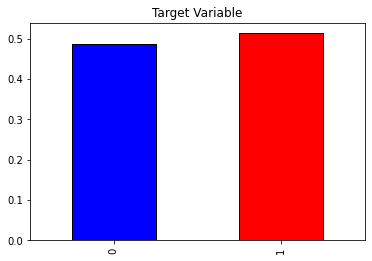

In [12]:
df['target'].value_counts(normalize=True).plot.bar(color=['red', 'blue'], edgecolor= 'black', title = 'Target Variable')

<AxesSubplot:title={'center':'Sex Variables'}>

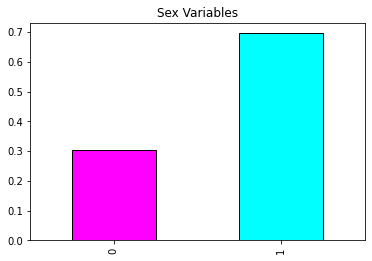

In [13]:
df['sex'].value_counts(normalize=True).plot.bar(color= ['cyan', 'magenta'], edgecolor= 'black', title= "Sex Variables")

<AxesSubplot:title={'center':'Chest Pain Variable'}>

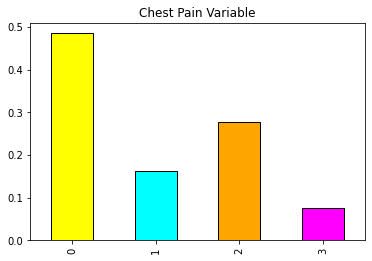

In [14]:
df['cp'].value_counts(normalize=True).plot.bar(color= ['yellow', 'orange', 'cyan', 'magenta'], edgecolor= 'black', title= "Chest Pain Variable")

<AxesSubplot:title={'center':'- Slope'}>

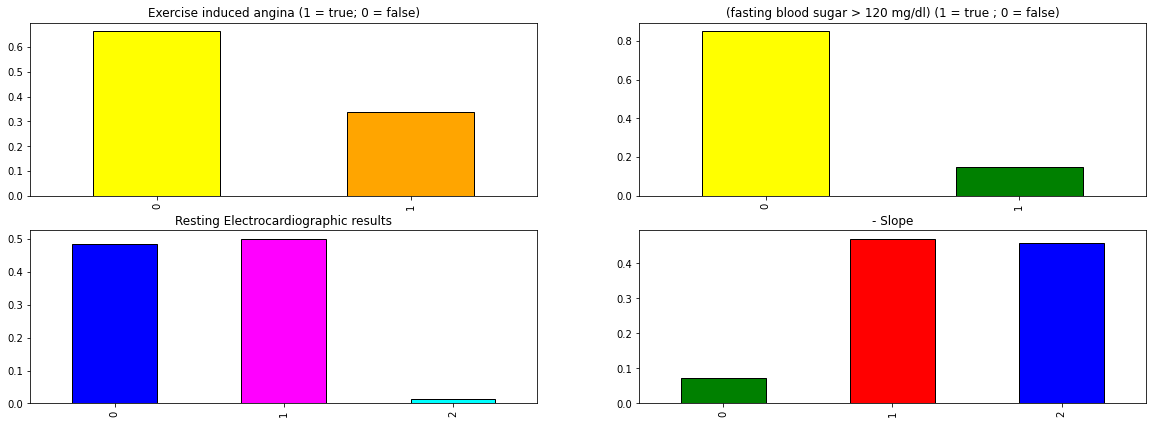

In [15]:
plt.figure(figsize= (20,7))
plt.subplot(221)
df['exang'].value_counts(normalize=True).plot.bar(color= ['yellow', 'orange'], edgecolor= 'black', title= "Exercise induced angina (1 = true; 0 = false)")
plt.subplot(222)
df['fbs'].value_counts(normalize=True).plot.bar(color= ['yellow', 'green'], edgecolor= 'black', title = "(fasting blood sugar > 120 mg/dl) (1 = true ; 0 = false)")
plt.subplot(223)
df['restecg'].value_counts(normalize=True).plot.bar(color= ['magenta', 'blue', 'cyan'], edgecolor= 'black', title= "Resting Electrocardiographic results")
plt.subplot(224)
df['slope'].value_counts(normalize=True).plot.bar(color= ['red', 'blue', 'green'], edgecolor= 'black', title = "- Slope")

<AxesSubplot:title={'center':'Thalium Stress Test Result ~ (0,3)'}>

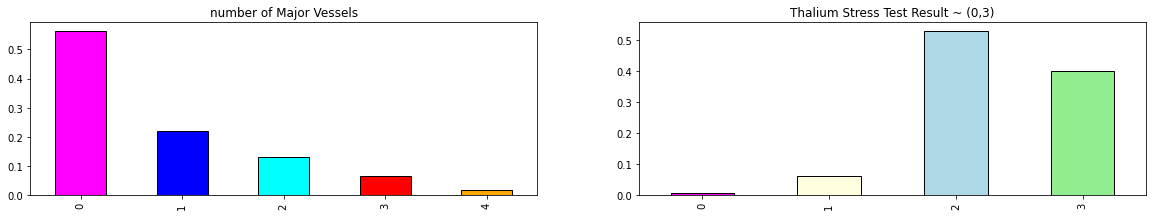

In [16]:
plt.figure(figsize=(20,7))
plt.subplot(221)
df['ca'].value_counts(normalize=True).plot.bar(color= ['magenta', 'blue', 'cyan', 'red', 'orange'], edgecolor= 'black', title = "number of Major Vessels")
plt.subplot(222)
df['thal'].value_counts(normalize= True).plot.bar(color= ['lightblue', 'lightgreen', 'lightyellow', 'magenta'],edgecolor= 'black', title = "Thalium Stress Test Result ~ (0,3)")

In [20]:
numerical_cols

['age', 'trestbs', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:title={'center':'Maximum Heart Rate Achieved'}, ylabel='Frequency'>

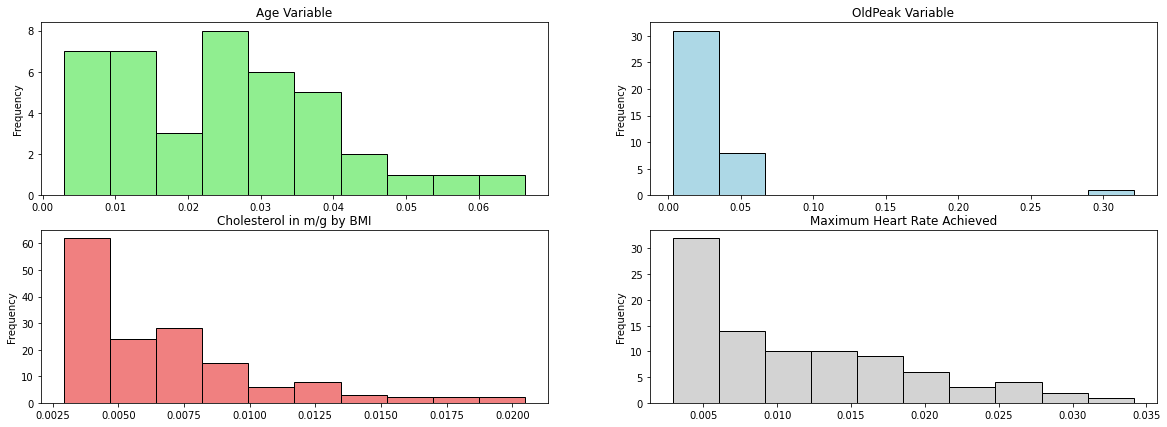

In [23]:
plt.figure(figsize=(20,7))
plt.subplot(221)
df['age'].value_counts(normalize=True).plot.hist(edgecolor = 'black', color= 'lightgreen', title = "Age Variable")
plt.subplot(222)
df['oldpeak'].value_counts(normalize=True).plot.hist(edgecolor= 'black', color= 'lightblue', title = "OldPeak Variable")
plt.subplot(223)
df['chol'].value_counts(normalize =True).plot.hist(edgecolor= 'black', color = 'lightcoral', title = "Cholesterol in m/g by BMI")
plt.subplot(224)
df['thalach'].value_counts(normalize=True).plot.hist(edgecolor= 'black', color = 'lightgrey', title = 'Maximum Heart Rate Achieved')

<AxesSubplot:title={'center':'Resting Blood Pressure in mm hg'}, ylabel='Frequency'>

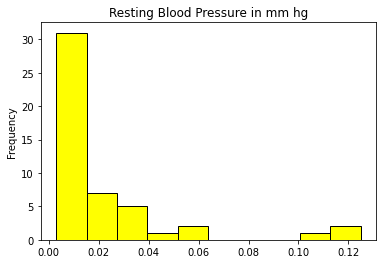

In [30]:
df['trestbps'].value_counts(normalize=True).plot.hist(color = 'yellow', edgecolor = 'black', title = "Resting Blood Pressure in mm hg")

<AxesSubplot:title={'center':'Effect of Age on Heart Attack'}, xlabel='age', ylabel='target'>

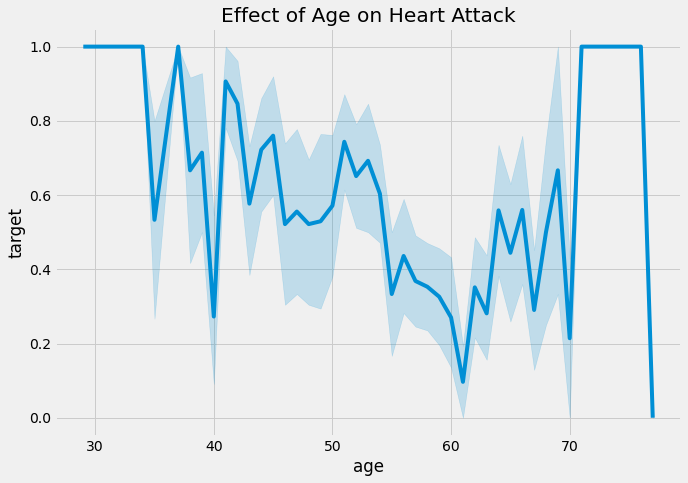

In [32]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Effect of Age on Heart Attack")
sns.lineplot(x= df['age'], y = df['target'])

<AxesSubplot:title={'center':'Effect of Age on Blood Pressure'}, xlabel='age', ylabel='trestbps'>

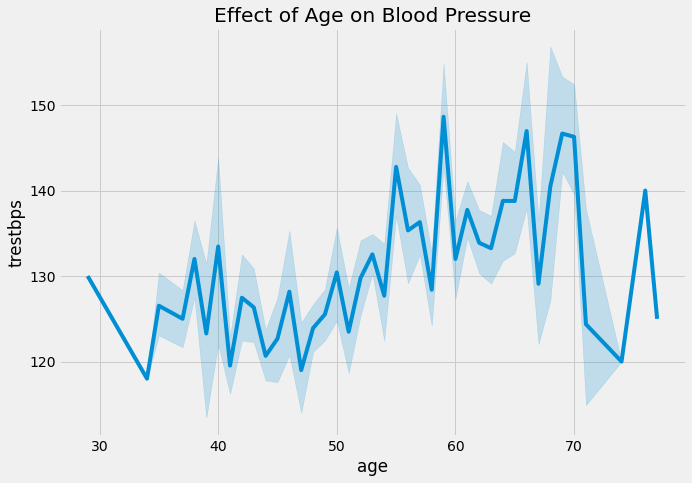

In [33]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
plt.title("Effect of Age on Blood Pressure")
sns.lineplot(x= df['age'], y= df['trestbps'])

<AxesSubplot:title={'center':'Effect of Age on Cholesterol'}, xlabel='age', ylabel='chol'>

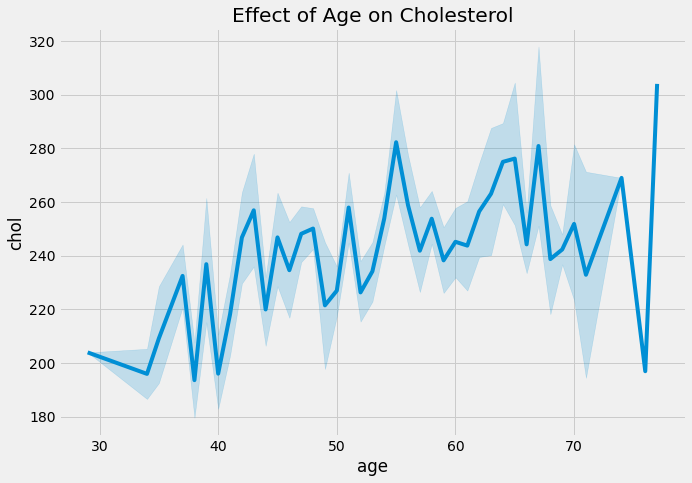

In [35]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Effect of Age on Cholesterol")
sns.lineplot(x= df['age'], y=df['chol'])

<AxesSubplot:title={'center':'Effect on age of Heart Rate'}, xlabel='age', ylabel='thalach'>

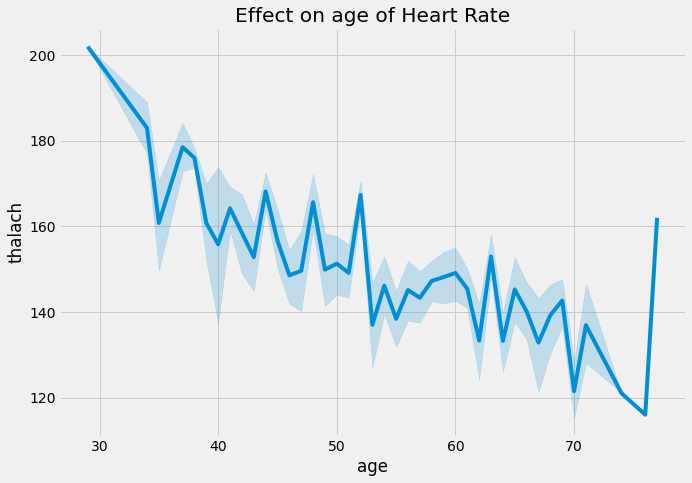

In [36]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Effect on age of Heart Rate")
sns.lineplot(x= df['age'], y = df['thalach'])

<AxesSubplot:title={'center':'Effect of Heart attack with increase in age & Heart Rate'}, xlabel='age', ylabel='thalach'>

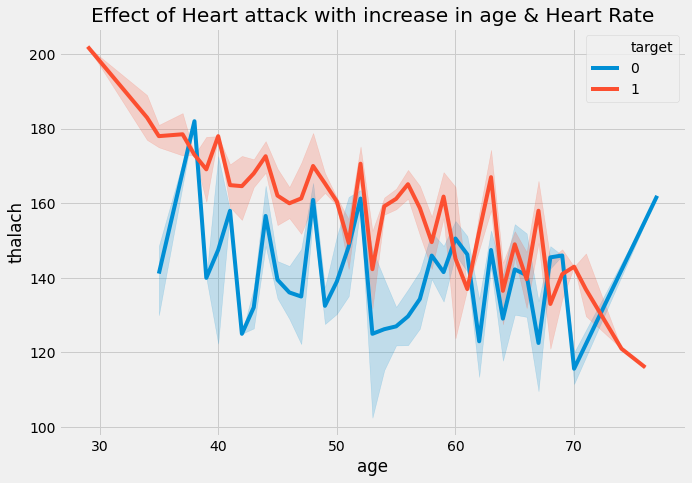

In [37]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Effect of Heart attack with increase in age & Heart Rate")
sns.lineplot(x = df['age'], y= df['thalach'], hue = df['target'])

<AxesSubplot:title={'center':'effect of heart attack with increase in age and cholestrol'}, xlabel='age', ylabel='chol'>

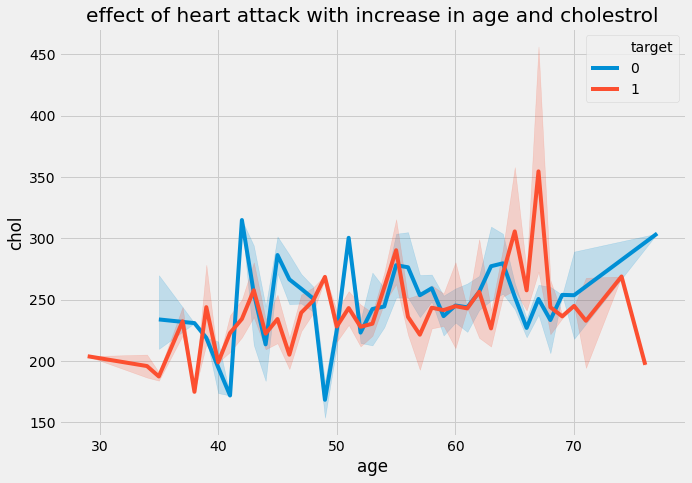

In [38]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and cholestrol")
sns.lineplot(x= df['age'], y= df['chol'], hue= df['target'])

<AxesSubplot:title={'center':'effect of heart attack with increase in age and blood pressure'}, xlabel='age', ylabel='trestbps'>

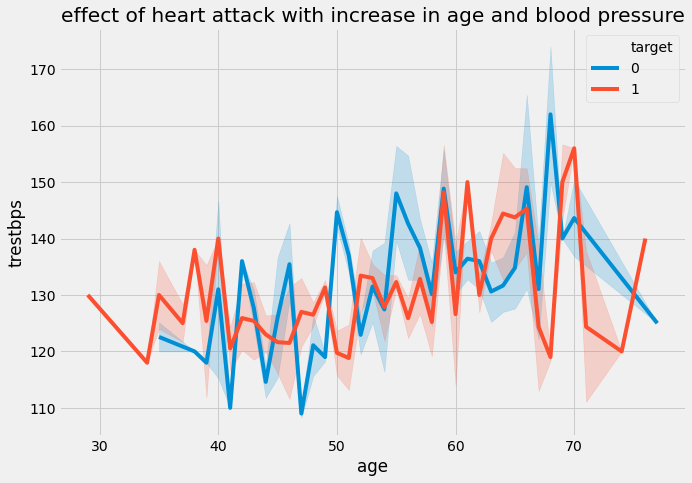

In [39]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("effect of heart attack with increase in age and blood pressure")
sns.lineplot(x= df['age'], y= df['trestbps'], hue= df['target'])

In [40]:
target = df['target']
target

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [43]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


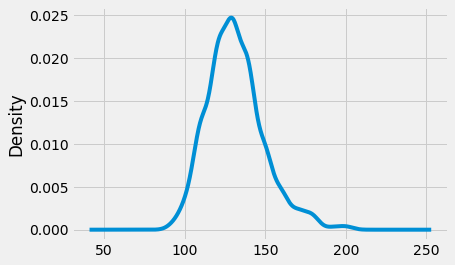

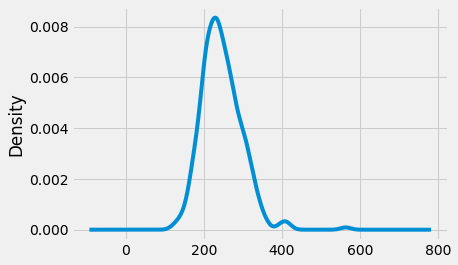

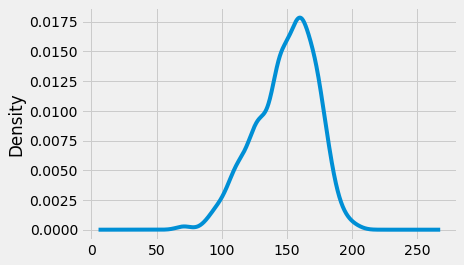

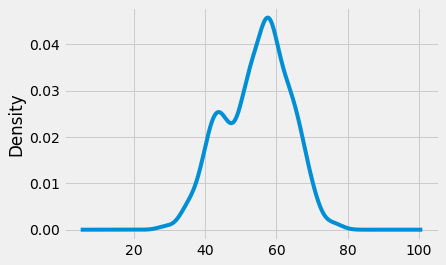

In [44]:
df['trestbps'].plot(kind= 'density')
plt.show()
df['chol'].plot(kind='density')
plt.show()
df['thalach'].plot(kind= 'density')
plt.show()
df['age'].plot(kind= 'density')
plt.show()

In [45]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [46]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df)
robust_df = pd.DataFrame(robust_df, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])
robust_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.307692,0.0,-0.5,-0.25,-0.437500,0.0,0.0,0.470588,0.0,0.111111,1.0,2.0,1.0
1,-0.230769,0.0,-0.5,0.50,-0.578125,1.0,-1.0,0.088235,1.0,1.277778,-1.0,0.0,1.0
2,1.076923,0.0,-0.5,0.75,-1.031250,0.0,0.0,-0.794118,1.0,1.000000,-1.0,0.0,1.0
3,0.384615,0.0,-0.5,0.90,-0.578125,0.0,0.0,0.264706,0.0,-0.444444,1.0,1.0,1.0
4,0.461538,-1.0,-0.5,0.40,0.843750,1.0,0.0,-1.352941,0.0,0.611111,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.230769,0.0,0.0,0.50,-0.296875,0.0,0.0,0.352941,1.0,-0.444444,1.0,0.0,0.0
1021,0.307692,0.0,-0.5,-0.25,0.281250,0.0,-1.0,-0.323529,1.0,1.111111,0.0,1.0,1.0
1022,-0.692308,0.0,-0.5,-1.00,0.546875,0.0,-1.0,-1.000000,1.0,0.111111,0.0,1.0,0.0
1023,-0.461538,-1.0,-0.5,-1.00,0.218750,0.0,-1.0,0.205882,0.0,-0.444444,1.0,0.0,0.0


In [47]:
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(robust_df)
standard_df = pd.DataFrame(standard_df, columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [48]:
standard_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122


In [49]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size = 0.1, random_state= 42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(922, 13)
(103, 13)
(922,)
(103,)


In [52]:
logistic = LogisticRegression(max_iter = 100, random_state= 1, n_jobs=-1)
logistic.fit(x_train, y_train)
pred1 = logistic.predict(x_test)
pred1

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [53]:
logistic.score(x_train, y_train)*100

85.24945770065075

In [54]:
from sklearn.metrics import accuracy_score

print('Logistic Regreesion model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred1)))

Logistic Regreesion model accuracy score: 0.8155


In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
d_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train)*100,2)
print(f'{acc_decision_tree}%')

100.0%


In [57]:
from sklearn.metrics import accuracy_score

print("Decision Tree model accuracy score: {0:0.4f}".format(accuracy_score(y_test, d_pred)))

Decision Tree model accuracy score: 0.9709


In [58]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(x_train, y_train)
pred2 = lgbm.predict(x_test)
acc_lgbm = round(lgbm.score(x_train, y_train)*100,2)
print(f'{acc_lgbm}%')

100.0%


In [60]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data= df, label = target)

In [61]:
params = { 
            'objective': 'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 0.01,
            'n_estimators': 100
        }

In [62]:
import xgboost as xgb
xgbo = xgb.XGBClassifier(**params)
xgbo.fit(x_train, y_train)
pred3 = xgbo.predict(x_test)
acc_xgbo = round(xgbo.score(x_train, y_train)*100,2)
print(f'{acc_xgbo}%')

[17:12:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
90.13%


In [63]:
from sklearn.metrics import accuracy_score

print("XGBoost model accuracy score: {0:0.4f}".format(accuracy_score(y_test, pred3)))

XGBoost model accuracy score: 0.8350


In [66]:
from xgboost import cv

params = {"objective": "binary:logistic", "colsample_bytree": 0.3, "learning_rate":0.1,
         "max_depth": 5, "alpha": 10}
xgb_cv = cv(dtrain=data_dmatrix, params = params, nfold=3,
                     num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [67]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.693896,0.025919,0.654387,0.018576
1,0.885367,0.007980,0.853164,0.015071
2,0.894429,0.006814,0.871107,0.014370
3,0.912298,0.009000,0.886555,0.002931
4,0.925436,0.017935,0.903526,0.015677


In [68]:
xgb_cv.shape

(50, 4)

In [70]:
accuracy_xgb = xgb_cv['train-auc-mean'][49]
print((xgb_cv["train-auc-mean"]).tail(1))

49    0.960578
Name: train-auc-mean, dtype: float64


In [72]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Lightgbm', 'XgBoost', 'XgBoost with cross validation'],
    'Score': [accuracy_score(y_test, pred1)*100, accuracy_score(y_test, d_pred)*100, accuracy_score(y_test, pred2)*100, accuracy_score(y_test,pred3), accuracy_xgb*100]
})

models.sort_values(by = "Score", ascending = False)

,Model,Score
1,Decision Tree,97.087379
2,Lightgbm,97.087379
4,XgBoost with cross validation,96.057767
0,Logistic Regression,81.553398
3,XgBoost,0.834951
